In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
cd /content/drive/MyDrive/Khai phá web

/content/drive/.shortcut-targets-by-id/1293VCyIJ5TbEhDBBNczFzCVtuWvZ-mZV/Khai phá web


In [114]:
import pandas as pd
import numpy as np

In [115]:
data = pd.read_csv('data.csv')
data = data[['Review_Text', 'Rating']]
data

,Review_Text,Rating
0,fastpass is a con. You can only check in yup o...,1
1,I am so glad that I have been lucky enough to ...,1
2,"far too comercial, it is not 'in' theese day...",1
3,You have to pay a whole lot of money to get to...,1
4,We went Disney July 23.24th. Prices keep going...,1
...,...,...
11995,We visited the park November 2011. Weekdays we...,4
11996,"Firstly, I'd like to praise Disney regarding t...",4
11997,"This park is good, although not as good as the...",4
11998,The park was very organised. When we visited i...,4


In [116]:
def assign_label(label):
  if label == 1 or label == 2:
    return 1
  elif label == 3:
    return 2
  elif label == 4 or label == 5: 
    return 3

In [117]:
data['Rating'] = data['Rating'].transform(assign_label)
data

,Review_Text,Rating
0,fastpass is a con. You can only check in yup o...,1
1,I am so glad that I have been lucky enough to ...,1
2,"far too comercial, it is not 'in' theese day...",1
3,You have to pay a whole lot of money to get to...,1
4,We went Disney July 23.24th. Prices keep going...,1
...,...,...
11995,We visited the park November 2011. Weekdays we...,3
11996,"Firstly, I'd like to praise Disney regarding t...",3
11997,"This park is good, although not as good as the...",3
11998,The park was very organised. When we visited i...,3


In [118]:
npdata = np.array(data)
npdata

array([['fastpass is a con. You can only check in yup one ride at a time. We checked in after lunch.... Told to come back st 1130pm. No kidding.  All around mistake to be avoided.... St least today.',
        1],
       ['I am so glad that I have been lucky enough to go to the parks in the states and Disneyland Paris. This allowed me to compare this park to the others. Our family of 4 with two teens included have now been to all parks apart from Tokyo. Our least favourite park was HongKong in fact it was the bottom of our list by a long way. We disliked the food that may have been the fact that we prefer western style food. The small amount of western food available was poorly done in fact my daughter fed most of hers to the birds. The park itself was clean and pretty but small and the staff lacked personality. The castle was small and I felt lacked the feeling you get from the other parks. We did enjoy the Mystic manor and was my favourite ride, we also enjoyed the addition of the Dis

In [119]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag

In [120]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
stop_words = stopwords.words('english')

In [122]:
dictionary = {}
frequency = {}

In [123]:
# Input: 1 dòng dữ liệu bất kì 
# output: dữ liệu sạch đã qua xử lý 
def preprocess(line): 
  text = line.lower() # lower word
  text = "".join([char for char in text if char not in string.punctuation]) # remove punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

  words = word_tokenize(text)
  filter_words = [word for word in words if word not in stop_words] # filter stop word
  
  filter_text = ""
  for word in filter_words: 
    if len(word) != 1:
      filter_text += word + " "
    # if word not in dictionary: 
    #   dictionary[word] = 1
    # else: 
    #   dictionary[word] += 1

  return filter_text

In [124]:
def preprocess_with_dictionary(text, label):
  ntext = preprocess(text)
  nwords = word_tokenize(ntext)

  # calc dictionary vs frequency
  for word in nwords:
    if word not in dictionary:
      dictionary[word] = 1
      frequency[word] = [0,0,0]
    else: 
      dictionary[word] += 1
      frequency[word][label-1] += 1
      
  return ntext

## filter 1st: lọc với stopwords, kí tự đặc biệt (dấu chấm, dấu phẩy)

In [125]:
nnpdata = []
for npitem in npdata: 
  text = npitem[0]
  label = npitem[1]
  
  ntext = preprocess_with_dictionary(text, label)

  nnpitem = [ntext, label]
  nnpdata.append(nnpitem)

npdata = nnpdata

In [126]:
npdata

[['fastpass con check yup one ride time checked lunch told come back st 1130pm kidding around mistake avoided st least today ',
  1],
 ['glad lucky enough go parks states disneyland paris allowed compare park others family two teens included parks apart tokyo least favourite park hongkong fact bottom list long way disliked food may fact prefer western style food small amount western food available poorly done fact daughter fed birds park clean pretty small staff lacked personality castle small felt lacked feeling get parks enjoy mystic manor favourite ride also enjoyed addition disney characters small world apart disappointed rides children said space mountain worst one parks visited merchandise available also boring lacked variety compared parks first time disney park dont bother save little longer go one better parks tell disappointed maybe nothing compare would felt differently ',
  1],
 ['far comercial theese days bunkrupt next 10 20 years admission everything inside expensive crow

In [127]:
len(dictionary)

39536

In [128]:
len(frequency)

39536

## filter 2nd: lọc với tần suất xuất hiện trong tất cả các nhãn

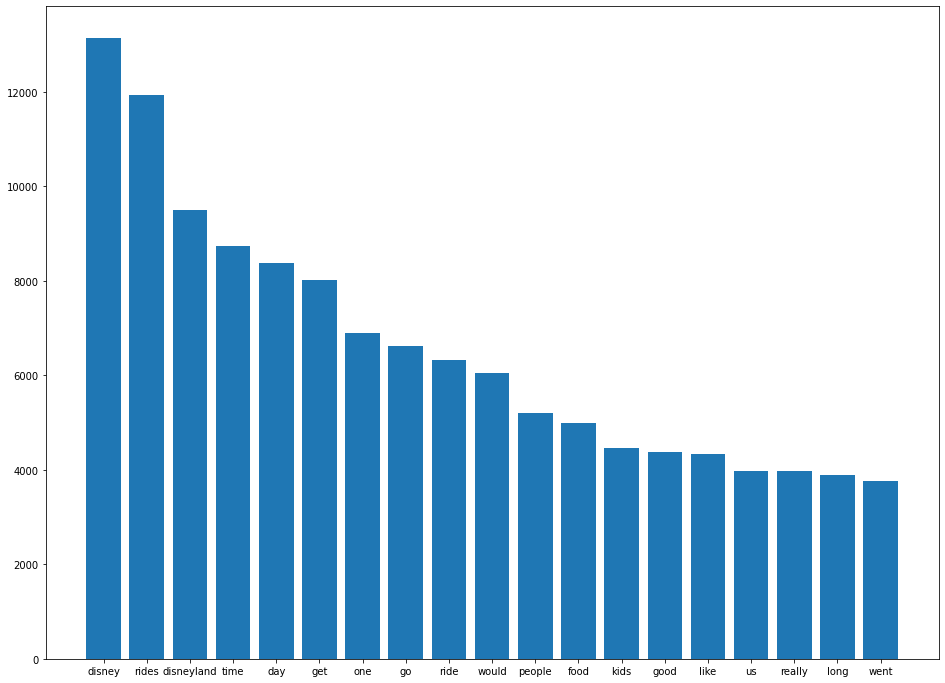

In [129]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Kiểm tra cận trên

plt.figure(figsize=(16,12))
sort = sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
sort = sort[1:20]

plt.bar( [item[0] for item in sort], [item[1] for item in sort])
plt.show()

Các từ có tần suất cao nhất trong từ điểm như là `like`, `good`,... có tính phân loại cảm xúc cao vì thế không thể loại bỏ các từ này, bò đi các từ xuất hiện trên 5000 lần

In [130]:
dictionary.pop('disney')
dictionary.pop('rides')
dictionary.pop('disneyland')
dictionary.pop('time')
dictionary.pop('day')
dictionary.pop('get')
dictionary.pop('one')
dictionary.pop('go')
dictionary.pop('ride')
dictionary.pop('would')
dictionary.pop('people')
dictionary.pop('food')

len(dictionary)

39524

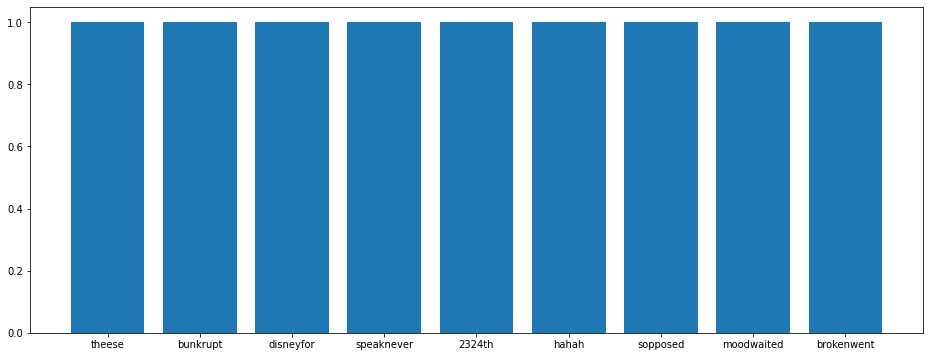

Số từ có tần suất xuất hiện là 1 là: 23688


In [131]:
plt.figure(figsize=(16,6))
sort = sorted(dictionary.items(), key=lambda item: item[1])
sort = sort[1:10]

plt.bar( [item[0] for item in sort], [item[1] for item in sort])
plt.show()
print("Số từ có tần suất xuất hiện là 1 là: {}".format(len([word for word in dictionary if dictionary[word] == 1])))

Các từ có tần suất xuất hiện là 1 là nhiều và không mang phân tính phân loại cảm xúc cao, ta có thể loại bỏ các từ này ra khỏi từ điển để giảm khối lượng từ điển

In [132]:
ndictionary = {}

for word in dictionary: 
  if dictionary[word] != 1:
    ndictionary[word] = dictionary[word]

dictionary = ndictionary

In [133]:
len(dictionary)

15836

## Lọc lại dữ liệu và giữ lại các từ có trong từ điển

In [134]:
def filter_with_dictionary(text):
  words = word_tokenize(text)
  nwords = [word for word in words if word in dictionary]

  ntext = ""
  for word in nwords:
    ntext += word + " "

  return ntext

In [135]:
nnpdata = []
for npitem in npdata: 
  text = npitem[0]
  label = npitem[1]
  
  ntext = filter_with_dictionary(text)

  nnpitem = [ntext, label]
  nnpdata.append(nnpitem)

npdata = nnpdata

In [136]:
npdata

[['fastpass con check yup checked lunch told come back st 1130pm kidding around mistake avoided st least today ',
  1],
 ['glad lucky enough parks states paris allowed compare park others family two teens included parks apart tokyo least favourite park hongkong fact bottom list long way disliked may fact prefer western style small amount western available poorly done fact daughter fed birds park clean pretty small staff lacked personality castle small felt lacked feeling parks enjoy mystic manor favourite also enjoyed addition characters small world apart disappointed children said space mountain worst parks visited merchandise available also boring lacked variety compared parks first park dont bother save little longer better parks tell disappointed maybe nothing compare felt differently ',
  1],
 ['far days next 10 20 years admission everything inside expensive crowded long queues train lot expensive rubish adults boring worth visiti ',
  1],
 ['pay whole lot money paris stay paris p

In [137]:
df = pd.DataFrame(npdata, columns={"Review_Text", "Rating"})
df

,Rating,Review_Text
0,fastpass con check yup checked lunch told come...,1
1,glad lucky enough parks states paris allowed c...,1
2,far days next 10 20 years admission everything...,1
3,pay whole lot money paris stay paris pay absur...,1
4,went july prices keep going worst ever kids wa...,1
...,...,...
11995,visited park november 2011 weekdays great queu...,3
11996,firstly id like praise regarding disabled acce...,3
11997,park good although good florida weekend break ...,3
11998,park organised visited wasnt busy see well org...,3


In [138]:
import os

outname = 'ndata.csv'

if not os.path.exists(outname):
  df.to_csv(outname, index=False)

In [139]:
ndf = pd.read_csv('ndata.csv')
ndf

,Rating,Review_Text
0,fastpass con check yup checked lunch told come...,1
1,glad lucky enough parks states paris allowed c...,1
2,far days next 10 20 years admission everything...,1
3,pay whole lot money paris stay paris pay absur...,1
4,went july prices keep going worst ever kids wa...,1
...,...,...
11995,visited park november 2011 weekdays great queu...,3
11996,firstly id like praise regarding disabled acce...,3
11997,park good although good florida weekend break ...,3
11998,park organised visited wasnt busy see well org...,3


In [140]:
f = open('dictionary.txt', 'w')

for word in dictionary:
  f.write(word + "\n")

f.close()

In [141]:
ndic = open('dictionary.txt', 'r').read()
ndic

'fastpass\ncon\ncheck\nyup\nchecked\nlunch\ntold\ncome\nback\nst\n1130pm\nkidding\naround\nmistake\navoided\nleast\ntoday\nglad\nlucky\nenough\nparks\nstates\nparis\nallowed\ncompare\npark\nothers\nfamily\ntwo\nteens\nincluded\napart\ntokyo\nfavourite\nhongkong\nfact\nbottom\nlist\nlong\nway\ndisliked\nmay\nprefer\nwestern\nstyle\nsmall\namount\navailable\npoorly\ndone\ndaughter\nfed\nbirds\nclean\npretty\nstaff\nlacked\npersonality\ncastle\nfelt\nfeeling\nenjoy\nmystic\nmanor\nalso\nenjoyed\naddition\ncharacters\nworld\ndisappointed\nchildren\nsaid\nspace\nmountain\nworst\nvisited\nmerchandise\nboring\nvariety\ncompared\nfirst\ndont\nbother\nsave\nlittle\nlonger\nbetter\ntell\nmaybe\nnothing\ndifferently\nfar\ndays\nnext\n10\n20\nyears\nadmission\neverything\ninside\nexpensive\ncrowded\nqueues\ntrain\nlot\nrubish\nadults\nworth\nvisiti\npay\nwhole\nmoney\nstay\nabsurd\nenter\nshops\nrestaurants\nclosed\nattraction\n1830\ncabs\nsnow\nwhite\npersonal\ndoesnt\nlisten\never\nlearn\nefteli

In [142]:
dictionary

{'fastpass': 834,
 'con': 39,
 'check': 610,
 'yup': 6,
 'checked': 169,
 'lunch': 694,
 'told': 1365,
 'come': 1327,
 'back': 3467,
 'st': 56,
 '1130pm': 6,
 'kidding': 26,
 'around': 3155,
 'mistake': 144,
 'avoided': 48,
 'least': 1186,
 'today': 170,
 'glad': 315,
 'lucky': 242,
 'enough': 1243,
 'parks': 3510,
 'states': 130,
 'paris': 3121,
 'allowed': 496,
 'compare': 259,
 'park': 15425,
 'others': 529,
 'family': 2038,
 'two': 2425,
 'teens': 92,
 'included': 221,
 'apart': 226,
 'tokyo': 228,
 'favourite': 237,
 'hongkong': 84,
 'fact': 504,
 'bottom': 61,
 'list': 172,
 'long': 3882,
 'way': 2272,
 'disliked': 19,
 'may': 846,
 'prefer': 97,
 'western': 46,
 'style': 124,
 'small': 2349,
 'amount': 545,
 'available': 617,
 'poorly': 124,
 'done': 821,
 'daughter': 1050,
 'fed': 69,
 'birds': 8,
 'clean': 825,
 'pretty': 832,
 'staff': 3528,
 'lacked': 74,
 'personality': 9,
 'castle': 928,
 'felt': 910,
 'feeling': 295,
 'enjoy': 1148,
 'mystic': 69,
 'manor': 187,
 'also': 